In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

Load the CSV file into a pandas DataFrame

In [20]:
file_path = 'drug200.csv'
df = pd.read_csv(file_path)

Display the first few rows to get a sense of the data

In [21]:
print("First few rows of the data:")
print(df.head())

First few rows of the data:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


Statistical summary of numeric columns

In [22]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


Check for missing values

In [23]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Unique values in categorical columns (Sex, BP, Cholesterol, Drug)

In [24]:
print("\nUnique values in categorical columns:")
for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    print(f"{column}: {df[column].unique()}")


Unique values in categorical columns:
Sex: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']
Drug: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


Visualize the distribution of the target variable (Drug)

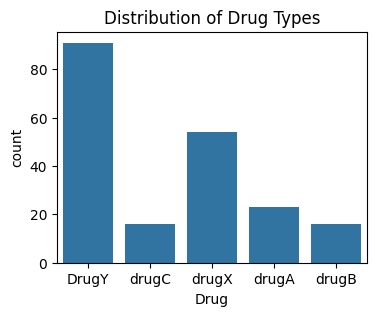

In [25]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Drug', data=df)
plt.title('Distribution of Drug Types')
plt.show()

Label encoding for categorical variables

In [27]:
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

Label encoder for the 'Drug' column and drug class mappings

In [28]:
drug_label_encoder = LabelEncoder()
df['Drug'] = drug_label_encoder.fit_transform(df['Drug'])

drug_classes = drug_label_encoder.classes_
print("\nDrug class mappings:")
for idx, drug in enumerate(drug_classes):
    print(f"Class {idx}: {drug}")


Drug class mappings:
Class 0: DrugY
Class 1: drugA
Class 2: drugB
Class 3: drugC
Class 4: drugX


Assign features and target variables

In [29]:
X = df.drop(columns='Drug')
y = df['Drug']

Split data into training and testing sets (80% train, 20% test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization - only applied to numerical features

In [31]:
scaler = StandardScaler()
X_train[['Age', 'Na_to_K']] = scaler.fit_transform(X_train[['Age', 'Na_to_K']])
X_test[['Age', 'Na_to_K']] = scaler.transform(X_test[['Age', 'Na_to_K']])

Model 1: Logistic Regression

In [38]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(drug_label_encoder.inverse_transform(y_test), drug_label_encoder.inverse_transform(y_pred_log_reg)))


Logistic Regression Results:
Accuracy: 0.85
              precision    recall  f1-score   support

       DrugY       0.88      0.93      0.90        15
       drugA       0.86      1.00      0.92         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.20      0.33         5
       drugX       0.77      0.91      0.83        11

    accuracy                           0.85        40
   macro avg       0.90      0.81      0.80        40
weighted avg       0.87      0.85      0.82        40



Model 2: Random Forest Classifier

In [39]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(drug_label_encoder.inverse_transform(y_test), drug_label_encoder.inverse_transform(y_pred_rf)))



Random Forest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Model 3: K-Nearest Neighbors (KNN)

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print("\nK-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(drug_label_encoder.inverse_transform(y_test), drug_label_encoder.inverse_transform(y_pred_knn)))


K-Nearest Neighbors Results:
Accuracy: 0.9
              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugA       1.00      1.00      1.00         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.40      0.57         5
       drugX       0.83      0.91      0.87        11

    accuracy                           0.90        40
   macro avg       0.90      0.86      0.85        40
weighted avg       0.91      0.90      0.89        40

